<a href="https://colab.research.google.com/github/dkuzzmin/DI-Bootcamp/blob/main/Week5/Day2/W5_Day2_XC_DC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## **2. Daily Challenge: Daily Challenge: Analyzing The IMDB Movie Dataset With Matplotlib And Seaborn**

**1. Load and Inspect Data:**


In [4]:
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


**2. Data Preprocessing:**

In [14]:
df['Gross'] = df['Gross'].fillna('0')
df['Gross'] = df['Gross'].str.replace(',', '').astype(int)

In [19]:
df[df['Meta_score'].isna()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,0
54,https://m.media-amazon.com/images/M/MV5BNWJhMD...,Ayla: The Daughter of War,2017,NaN,125 min,"Biography, Drama, History",8.4,"In 1950, amid-st the ravages of the Korean War...",NaN,Can Ulkay,Erdem Can,Çetin Tekindor,Ismail Hacioglu,Kyung-jin Lee,34112,0
55,https://m.media-amazon.com/images/M/MV5BY2FiMT...,Vikram Vedha,2017,UA,147 min,"Action, Crime, Drama",8.4,"Vikram, a no-nonsense police officer, accompan...",NaN,Gayatri,Pushkar,Madhavan,Vijay Sethupathi,Shraddha Srinath,28401,0
57,https://m.media-amazon.com/images/M/MV5BMTQ4Mz...,Dangal,2016,U,161 min,"Action, Biography, Drama",8.4,Former wrestler Mahavir Singh Phogat and his t...,NaN,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh,Sanya Malhotra,156479,12391761
65,https://m.media-amazon.com/images/M/MV5BMDhjZW...,Taare Zameen Par,2007,U,165 min,"Drama, Family",8.4,An eight-year-old boy is thought to be a lazy ...,NaN,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan,Tisca Chopra,168895,1223869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,https://m.media-amazon.com/images/M/MV5BMTU5NT...,The Day the Earth Stood Still,1951,U,92 min,"Drama, Sci-Fi",7.7,An alien lands and tells the people of Earth t...,NaN,Robert Wise,Michael Rennie,Patricia Neal,Hugh Marlowe,Sam Jaffe,76315,0
874,https://m.media-amazon.com/images/M/MV5BYWUxMz...,Gilda,1946,Approved,110 min,"Drama, Film-Noir, Romance",7.7,A small-time gambler hired to work in a Buenos...,NaN,Charles Vidor,Rita Hayworth,Glenn Ford,George Macready,Joseph Calleia,27991,0
899,https://m.media-amazon.com/images/M/MV5BNGMxZj...,El cuerpo,2012,NaN,112 min,"Mystery, Thriller",7.6,A detective searches for the body of a femme f...,NaN,Oriol Paulo,Jose Coronado,Hugo Silva,Belén Rueda,Aura Garrido,57549,0
909,https://m.media-amazon.com/images/M/MV5BMjI2OD...,Celda 211,2009,NaN,113 min,"Action, Adventure, Crime",7.6,The story of two men on different sides of a p...,NaN,Daniel Monzón,Luis Tosar,Alberto Ammann,Antonio Resines,Manuel Morón,63882,0


In [20]:
df['Meta_score'] = df['Meta_score'].fillna('0')

In [22]:
df.sample(20)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
911,https://m.media-amazon.com/images/M/MV5BYmFmNj...,La piel que habito,2011,R,120 min,"Drama, Horror, Thriller",7.6,"A brilliant plastic surgeon, haunted by past t...",70.0,Pedro Almodóvar,Antonio Banderas,Elena Anaya,Jan Cornet,Marisa Paredes,138959,3185812
790,https://m.media-amazon.com/images/M/MV5BYWMwMz...,Black Hawk Down,2001,A,144 min,"Drama, History, War",7.7,160 elite U.S. soldiers drop into Somalia to c...,74.0,Ridley Scott,Josh Hartnett,Ewan McGregor,Tom Sizemore,Eric Bana,364254,108638745
484,https://m.media-amazon.com/images/M/MV5BMGUyM2...,The Irishman,2019,R,209 min,"Biography, Crime, Drama",7.9,An old man recalls his time painting houses fo...,94.0,Martin Scorsese,Robert De Niro,Al Pacino,Joe Pesci,Harvey Keitel,324720,7000000
298,https://m.media-amazon.com/images/M/MV5BMGQ5OD...,Inherit the Wind,1960,Passed,128 min,"Biography, Drama, History",8.1,"Based on a real-life case in 1925, two great l...",75.0,Stanley Kramer,Spencer Tracy,Fredric March,Gene Kelly,Dick York,27254,0
354,https://m.media-amazon.com/images/M/MV5BZmNjZW...,Slumdog Millionaire,2008,UA,120 min,"Drama, Romance",8.0,A Mumbai teenager reflects on his life after b...,84.0,Danny Boyle,Loveleen Tandan,Dev Patel,Freida Pinto,Saurabh Shukla,798882,141319928
899,https://m.media-amazon.com/images/M/MV5BNGMxZj...,El cuerpo,2012,NaN,112 min,"Mystery, Thriller",7.6,A detective searches for the body of a femme f...,0,Oriol Paulo,Jose Coronado,Hugo Silva,Belén Rueda,Aura Garrido,57549,0
840,https://m.media-amazon.com/images/M/MV5BODBmOW...,First Blood,1982,A,93 min,"Action, Adventure",7.7,A veteran Green Beret is forced by a cruel She...,61.0,Ted Kotcheff,Sylvester Stallone,Brian Dennehy,Richard Crenna,Bill McKinney,226541,47212904
430,https://m.media-amazon.com/images/M/MV5BNzdmZT...,Doctor Zhivago,1965,A,197 min,"Drama, Romance, War",8.0,"The life of a Russian physician and poet who, ...",69.0,David Lean,Omar Sharif,Julie Christie,Geraldine Chaplin,Rod Steiger,69903,111722000
470,https://m.media-amazon.com/images/M/MV5BMjI1MD...,Hunt for the Wilderpeople,2016,UA,101 min,"Adventure, Comedy, Drama",7.9,A national manhunt is ordered for a rebellious...,81.0,Taika Waititi,Sam Neill,Julian Dennison,Rima Te Wiata,Rachel House,111483,5202582
924,https://m.media-amazon.com/images/M/MV5BMTI5Mj...,Huo Yuan Jia,2006,PG-13,104 min,"Action, Biography, Drama",7.6,A biography of Chinese Martial Arts Master Huo...,70.0,Ronny Yu,Jet Li,Li Sun,Yong Dong,Yun Qu,72863,24633730


**3. Rating Trends Over Years:**

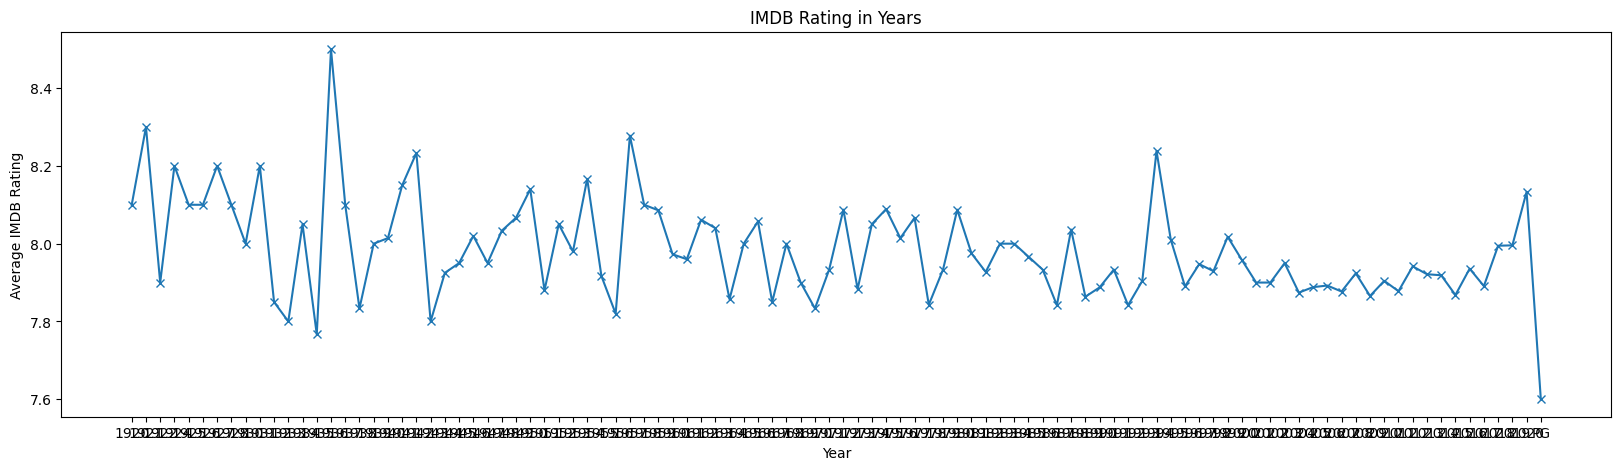

In [27]:
df_avr = df.groupby('Released_Year')['IMDB_Rating'].mean()

plt.figure(figsize=(20, 5))
plt.plot(df_avr, marker='x')

plt.title('IMDB Rating in Years')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.show()

**4.Genre Popularity Analysis:**

In [33]:
df['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [43]:
genre_list = df['Genre'].str.split(',').sum()
len(genre_list)
# genre_list.replace(' ','')
genre_list[:10]

['Drama',
 'Crime',
 ' Drama',
 'Action',
 ' Crime',
 ' Drama',
 'Crime',
 ' Drama',
 'Crime',
 ' Drama']

In [56]:
for i in range(len(genre_list)):
  genre_list[i] = genre_list[i].replace(' ','')
genre_list[:10]


['Drama',
 'Crime',
 'Drama',
 'Action',
 'Crime',
 'Drama',
 'Crime',
 'Drama',
 'Crime',
 'Drama']

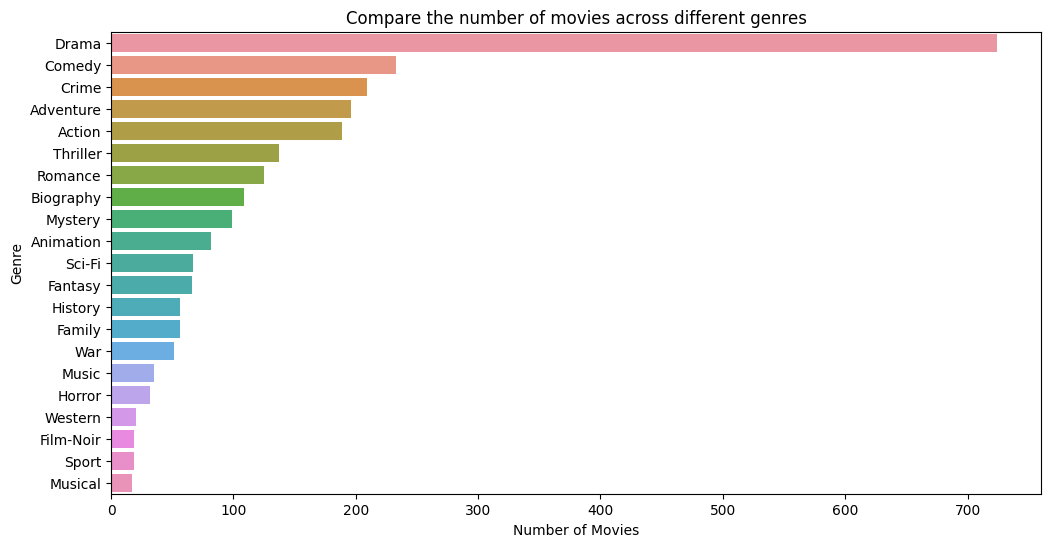

In [58]:
genre_count = pd.Series(genre_list).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_count.values, y=genre_count.index)

plt.title('Compare the number of movies across different genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

**5. Director’s Impact on Ratings:**




In [59]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


Text(0.5, 1.0, 'Relationship between directors and movie ratings')

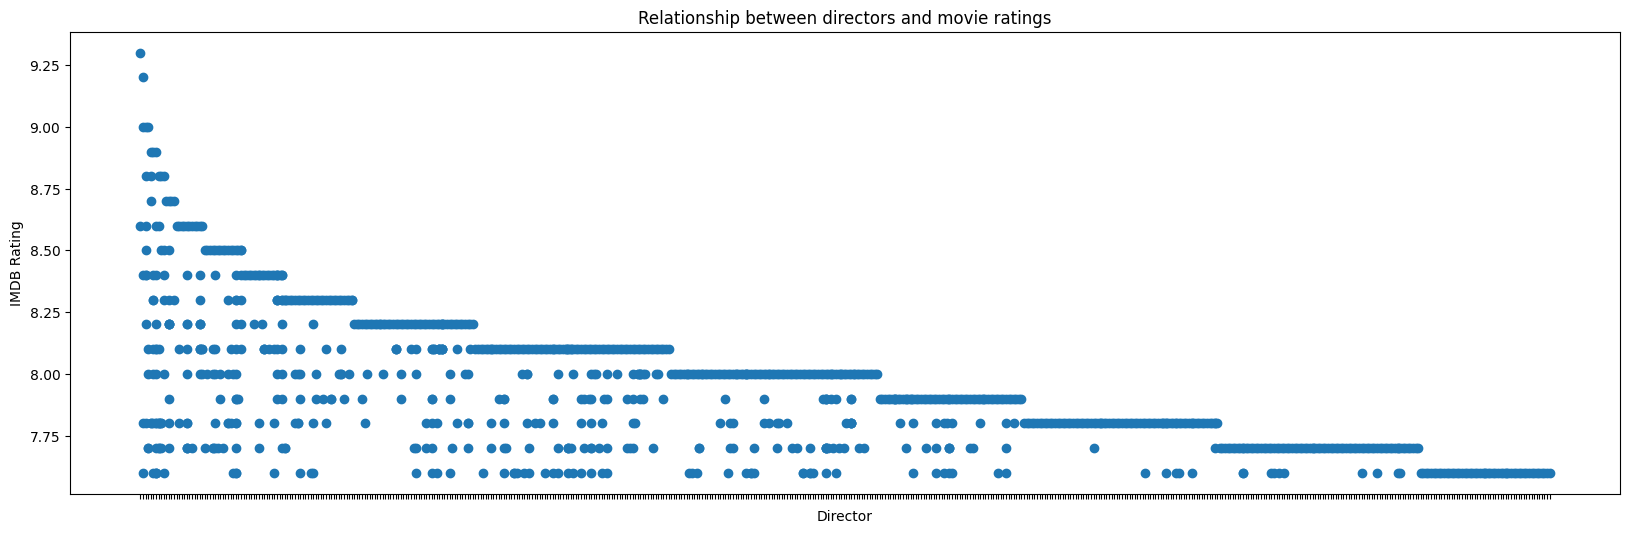

In [66]:
plt.figure(figsize=(20, 6))
plt.scatter(df['Director'], df['IMDB_Rating'])

plt.xlabel('Director')
plt.ylabel('IMDB Rating')
plt.gca().set_xticklabels([])

plt.title('Relationship between directors and movie ratings')

**6. Star Power Analysis:**

In [69]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [81]:
stardf = df[(df['Star1'] == 'Al Pacino') | (df['Star1'] == 'Christian Bale') | (df['Star1'] == 'Marlon Brando')]

stardf

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
36,https://m.media-amazon.com/images/M/MV5BMjA4ND...,The Prestige,2006,U,130 min,"Drama, Mystery, Sci-Fi",8.5,"After a tragic accident, two stage magicians e...",66.0,Christopher Nolan,Christian Bale,Hugh Jackman,Scarlett Johansson,Michael Caine,1190259,53089891
63,https://m.media-amazon.com/images/M/MV5BMTk4OD...,The Dark Knight Rises,2012,UA,164 min,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099
108,https://m.media-amazon.com/images/M/MV5BNjdjNG...,Scarface,1983,A,170 min,"Crime, Drama",8.3,"In 1980 Miami, a determined Cuban immigrant ta...",65.0,Brian De Palma,Al Pacino,Michelle Pfeiffer,Steven Bauer,Mary Elizabeth Mastrantonio,740911,45598982
155,https://m.media-amazon.com/images/M/MV5BOTY4Yj...,Batman Begins,2005,UA,140 min,"Action, Adventure",8.2,"After training with his mentor, Batman begins ...",70.0,Christopher Nolan,Christian Bale,Michael Caine,Ken Watanabe,Liam Neeson,1308302,206852432
164,https://m.media-amazon.com/images/M/MV5BNGMwNz...,Heat,1995,A,170 min,"Crime, Drama, Thriller",8.2,A group of professional bank robbers start to ...,76.0,Michael Mann,Al Pacino,Robert De Niro,Val Kilmer,Jon Voight,577113,67436818
305,https://m.media-amazon.com/images/M/MV5BY2I0MW...,On the Waterfront,1954,A,108 min,"Crime, Drama, Thriller",8.1,An ex-prize fighter turned longshoreman strugg...,91.0,Elia Kazan,Marlon Brando,Karl Malden,Lee J. Cobb,Rod Steiger,142107,9600000
398,https://m.media-amazon.com/images/M/MV5BZTM3Zj...,Scent of a Woman,1992,UA,156 min,Drama,8.0,A prep school student needing money agrees to ...,59.0,Martin Brest,Al Pacino,Chris O'Donnell,James Rebhorn,Gabrielle Anwar,263918,63895607


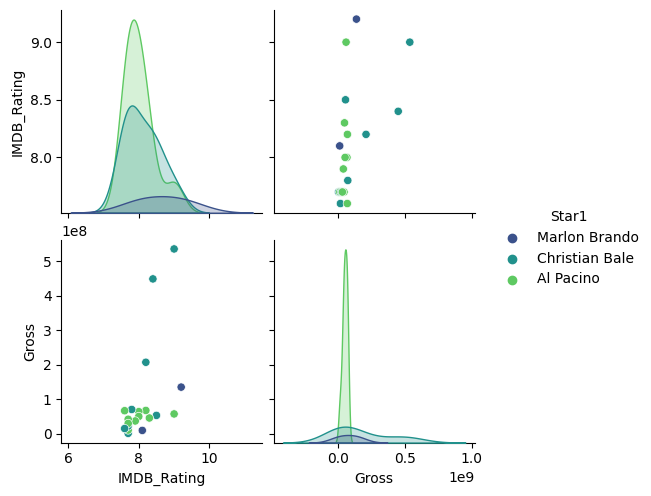

In [87]:
sns.pairplot(stardf, vars=['IMDB_Rating', 'Gross'], hue='Star1', palette='viridis')
plt.show()

**7. Box Plot of Genres vs. Ratings:**

In [106]:
qdf = df.copy()
qdf.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [107]:
qdf['Genre'] = qdf['Genre'].str.split(',')
qdf['Genre'] = qdf['Genre'].str[0]
qdf.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,Crime,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,Crime,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


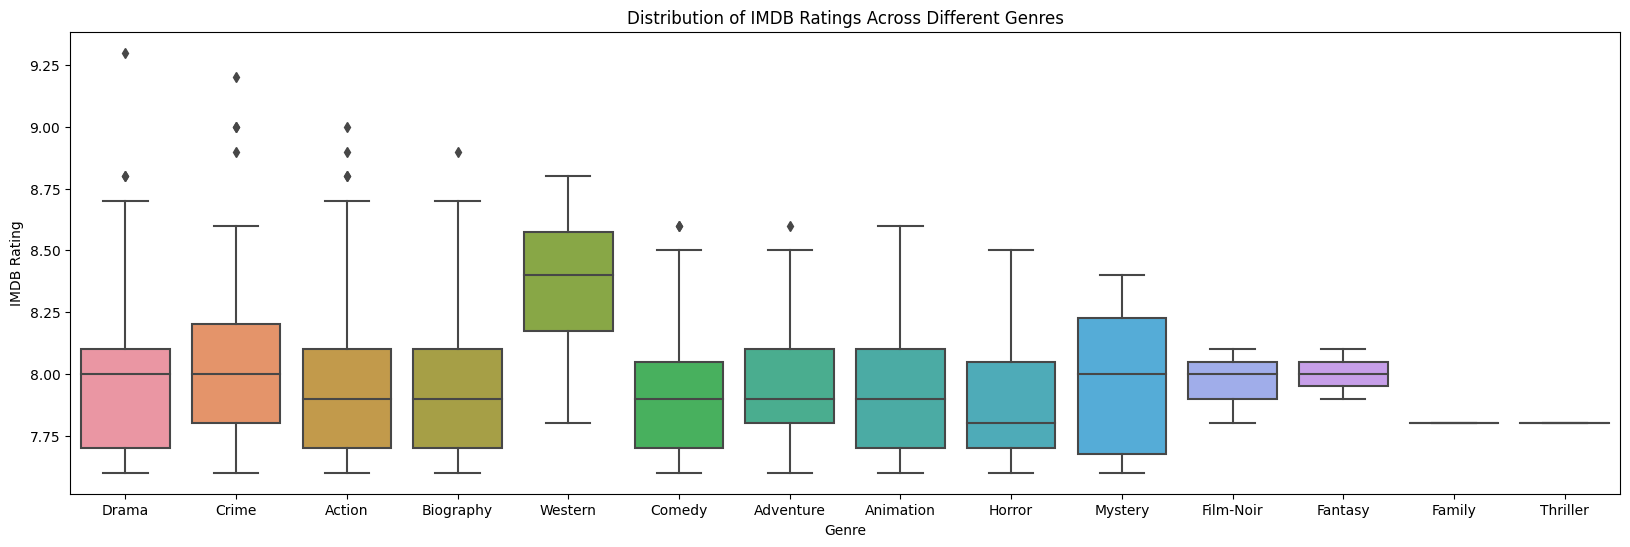

In [110]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Genre', y='IMDB_Rating', data=qdf)

plt.title('Distribution of IMDB Ratings across different Genres')

plt.ylabel('IMDB Rating')

plt.show()

**8.Correlation Heatmap:**


<ipython-input-116-57cfbc128d76>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].corr()


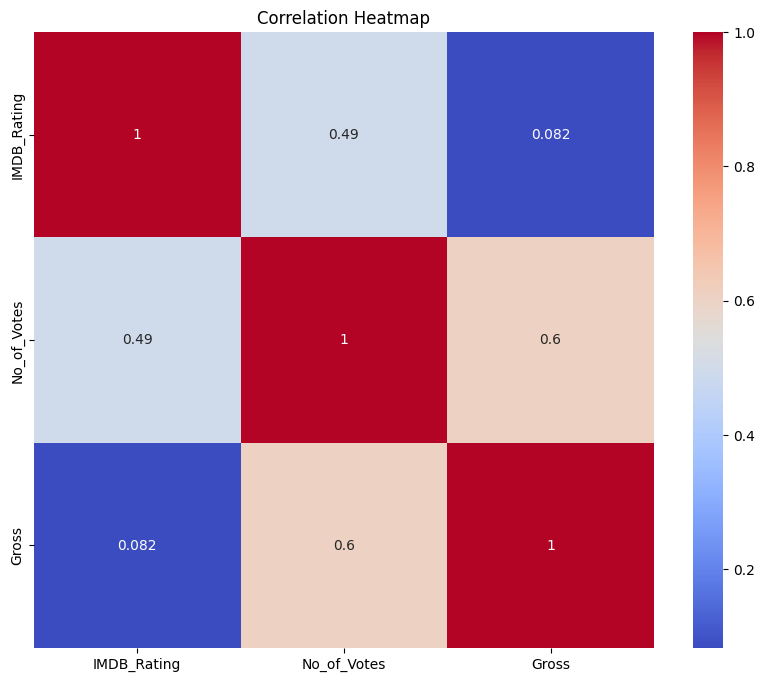

In [116]:
corr = df[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()